In [1]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image

### Part 1: Loading the image and finding the edges

In [201]:
im = np.array(Image.open("im03.jpg")).astype("double")

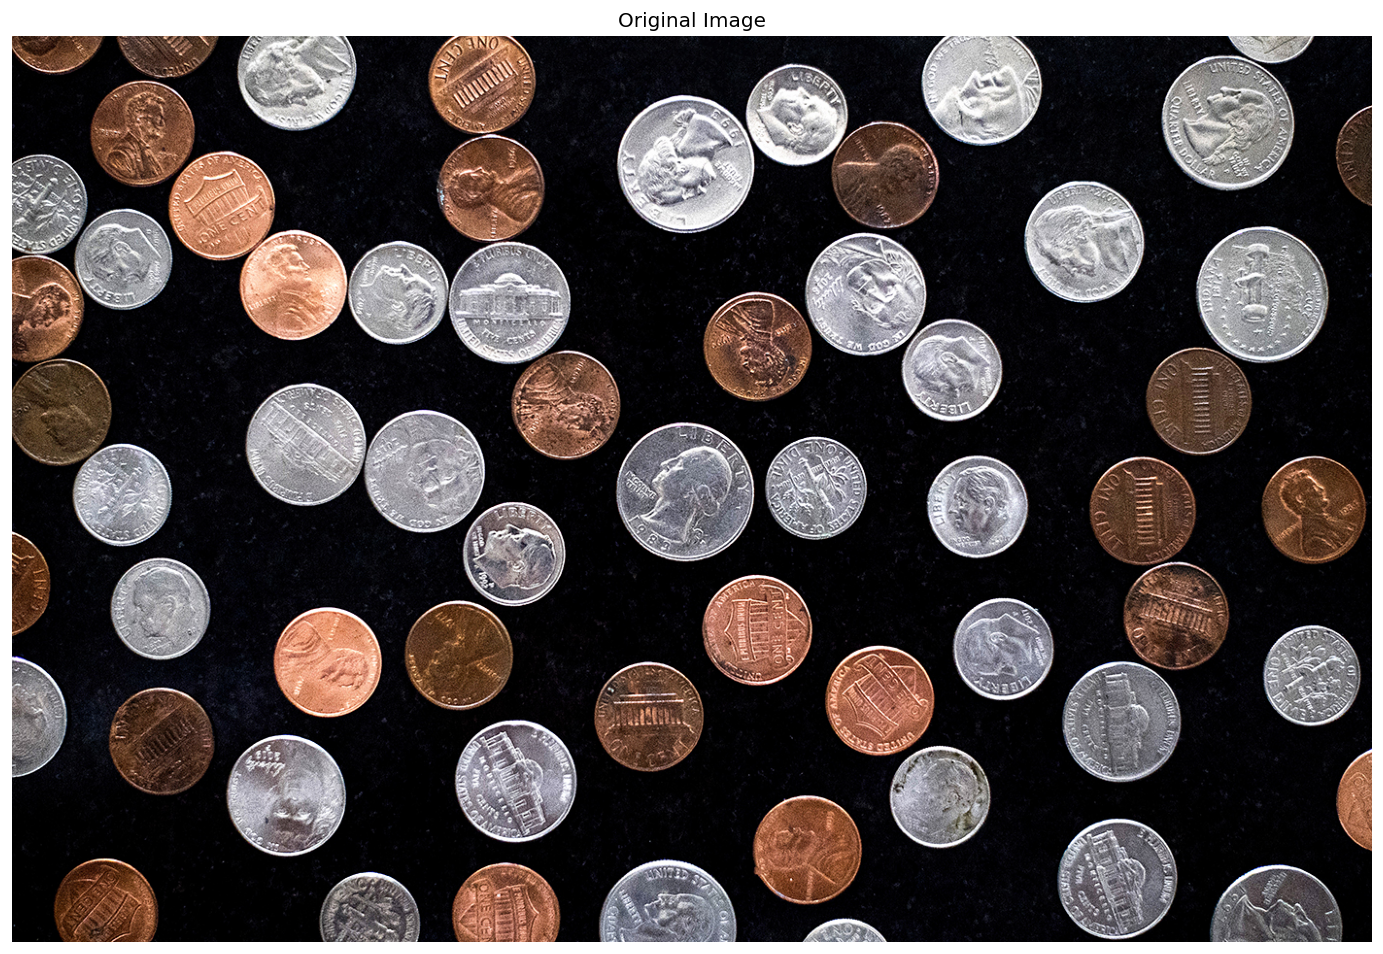

In [202]:
plt.figure(dpi=120,figsize=(15,10))
plt.imshow(im.astype("uint8"))
plt.axis("off")
plt.title("Original Image")
plt.show()

We first blur the image using a gaussian filter and then apply a threshold to increase the difference between the coins and the background. In this way, we can detect the edges of the coins more accurately.

In [4]:
# blurring and thresholding
im_smooth = cv.GaussianBlur(im,(5,5),cv.BORDER_DEFAULT)
im_smooth[(im_smooth[:,:,0] + im_smooth[:,:,1]+im_smooth[:,:,2])/3 > 30] = 255

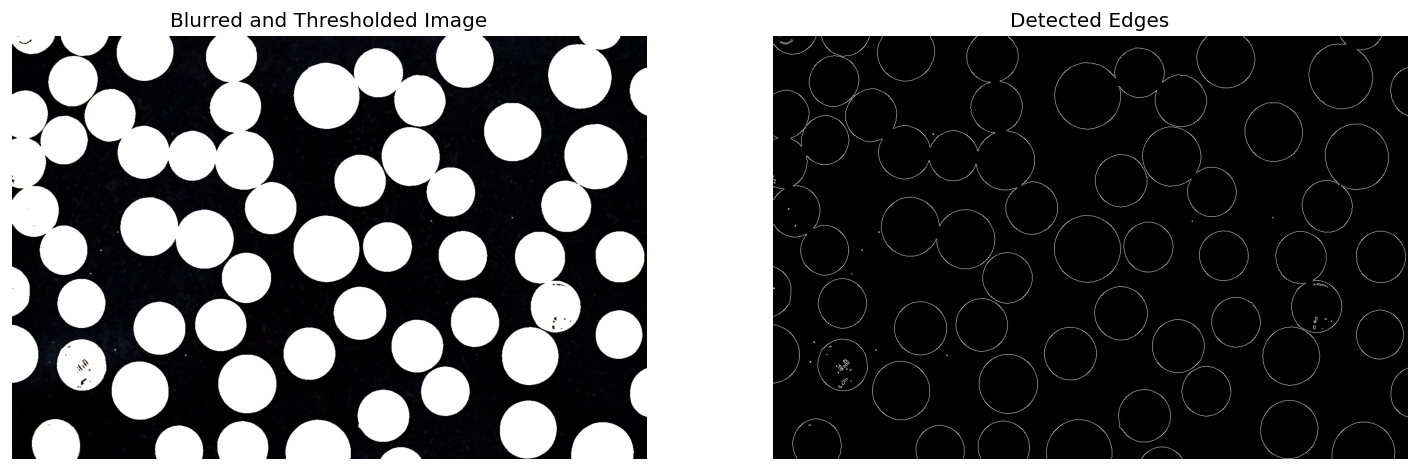

In [16]:
edges = cv.Canny(image = im_smooth.astype("uint8"), threshold1 = 220, threshold2 = 300)
edges[edges==0] = 0
edges[edges!=0] = 1
plt.figure(dpi=120,figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(im_smooth.astype("uint8"))
plt.axis("off")
plt.title("Blurred and Thresholded Image")
plt.subplot(1,2,2)
plt.imshow(edges,cmap='gray');
plt.axis("off")
plt.title("Detected Edges")
plt.show()

In [282]:
# saving the edges
Image.fromarray((edges*255).astype("uint8")).save("results/res11.jpg", "JPEG")

### Part 2: Finding the hough transform of the edge image

In [103]:
def hough_transform(edges, r_list, dr, dx, dy):
    # finding the dimensions
    h,w,c = edges.shape[0], edges.shape[1], r_list.shape[0]
    
    # creating the hough array
    hough_arr = np.zeros((h//dx,w//dy,c))
    
    for k in range(c):
        r = r_list[k]
        print("Finding the hough space of r =", r)
        last_percentage = 0
        for i in range(0, h//dx):
            x_loc = dx//2 + dx * i
            print("    i =", i)
            for j in range(0, w//dy):
                y_loc = dy//2 + dy * j
                # creating arrays containing the difference of x and y of each point
                x_arr = (np.repeat(np.arange(0,h).reshape((h,1)), w, 1) - x_loc)[edges==1]
                y_arr = (np.repeat(np.arange(0,w).reshape((1,w)), h, 0) - y_loc)[edges==1]
                # array of r of each point
                r_arr = np.sqrt((x_arr)**2 + (y_arr)**2)
                bool_arr = np.zeros(r_arr.shape)
                bool_arr[np.logical_and(r_arr>=r-dr, r_arr<r+dr)] = 1
                number_of_repeats = np.sum(bool_arr)
                hough_arr[i,j,k] = hough_arr[i,j,k] + number_of_repeats
    return hough_arr            

In [114]:
hough_arr = hough_transform(edges, np.array([50, 55, 60, 65, 70]), 3, 5, 5)

Finding the hough space of r = 50
    i = 0
    i = 1
    i = 2
    i = 3
    i = 4
    i = 5
    i = 6
    i = 7
    i = 8
    i = 9
    i = 10
    i = 11
    i = 12
    i = 13
    i = 14
    i = 15
    i = 16
    i = 17
    i = 18
    i = 19
    i = 20
    i = 21
    i = 22
    i = 23
    i = 24
    i = 25
    i = 26
    i = 27
    i = 28
    i = 29
    i = 30
    i = 31
    i = 32
    i = 33
    i = 34
    i = 35
    i = 36
    i = 37
    i = 38
    i = 39
    i = 40
    i = 41
    i = 42
    i = 43
    i = 44
    i = 45
    i = 46
    i = 47
    i = 48
    i = 49
    i = 50
    i = 51
    i = 52
    i = 53
    i = 54
    i = 55
    i = 56
    i = 57
    i = 58
    i = 59
    i = 60
    i = 61
    i = 62
    i = 63
    i = 64
    i = 65
    i = 66
    i = 67
    i = 68
    i = 69
    i = 70
    i = 71
    i = 72
    i = 73
    i = 74
    i = 75
    i = 76
    i = 77
    i = 78
    i = 79
    i = 80
    i = 81
    i = 82
    i = 83
    i = 84
    i = 85
    i = 86
    i = 87
    i = 

    i = 151
    i = 152
    i = 153
    i = 154
    i = 155
    i = 156
    i = 157
    i = 158
    i = 159
    i = 160
    i = 161
    i = 162
    i = 163
    i = 164
    i = 165
    i = 166
    i = 167
    i = 168
    i = 169
    i = 170
    i = 171
    i = 172
    i = 173
    i = 174
    i = 175
    i = 176
    i = 177
    i = 178
    i = 179
    i = 180
    i = 181
    i = 182
    i = 183
    i = 184
    i = 185
Finding the hough space of r = 70
    i = 0
    i = 1
    i = 2
    i = 3
    i = 4
    i = 5
    i = 6
    i = 7
    i = 8
    i = 9
    i = 10
    i = 11
    i = 12
    i = 13
    i = 14
    i = 15
    i = 16
    i = 17
    i = 18
    i = 19
    i = 20
    i = 21
    i = 22
    i = 23
    i = 24
    i = 25
    i = 26
    i = 27
    i = 28
    i = 29
    i = 30
    i = 31
    i = 32
    i = 33
    i = 34
    i = 35
    i = 36
    i = 37
    i = 38
    i = 39
    i = 40
    i = 41
    i = 42
    i = 43
    i = 44
    i = 45
    i = 46
    i = 47
    i = 48
    i = 49
    i 

### Part 3: Finding the circles

In [131]:
def hough_arr_to_im(hough_arr, im_shape, dx, dy):
    hough_im = np.zeros(im_shape)
    for i in range(hough_arr.shape[0]):
        x_loc = dx//2 + dx * i
        for j in range(hough_arr.shape[1]):
            y_loc = dy//2 + dy * j
            hough_im[x_loc, y_loc] = hough_arr[i,j]
    return hough_im

In [147]:
hough50 = hough_arr[:,:,0].copy()
hough55 = hough_arr[:,:,1].copy()
hough60 = hough_arr[:,:,2].copy()
hough65 = hough_arr[:,:,3].copy()
hough70 = hough_arr[:,:,4].copy()

In [238]:
# applying max window like question 1
def max_window(im, window_size = (9,9)):
    '''This function checks if on a window the point has the maximum value or not, if yes it saves its value and if
    not, it substitutes the pixel's value with 0'''
    m,n = im.shape
    out = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            is_max = True
            for k in range(max(0, i - window_size[0]//2), min(i + (window_size[0]+1)//2, m - 1)):
                for l in range(max(0, j - window_size[1]//2), min(j + (window_size[1]+1)//2, n - 1)):
                    if (im[k,l] > im[i,j]):
                        is_max = False
            if (is_max):
                out[i,j] = im[i,j]
    return out

In [239]:
hough50_windowed = max_window(hough50)
hough55_windowed = max_window(hough55)
hough60_windowed = max_window(hough60)
hough65_windowed = max_window(hough65)
hough70_windowed = max_window(hough70)

In [272]:
# Thresholding
hough50_final = hough50_windowed.copy()
hough50_final[hough50_windowed/hough50_windowed.max()<0.70] = 0
hough50_final[hough50_final != 0 ] = 50
hough55_final = hough55_windowed.copy()
hough55_final[hough55_windowed/hough55_windowed.max()<0.65] = 0
hough55_final[hough55_final != 0 ] = 55
hough60_final = hough60_windowed.copy()
hough60_final[hough60_windowed/hough60_windowed.max()<0.65] = 0
hough60_final[hough60_final != 0 ] = 60
hough65_final = hough65_windowed.copy()
hough65_final[hough65_windowed/hough65_windowed.max()<0.65] = 0
hough65_final[hough65_final != 0 ] = 65
hough70_final = hough70_windowed.copy()
hough70_final[hough70_windowed/hough70_windowed.max()<0.65] = 0
hough70_final[hough70_final != 0 ] = 70

In [273]:
# removing multiple circles detected for one coin
hough_final = np.dstack((hough50_final, hough55_final, hough60_final, hough65_final, hough70_final)).max(axis=2)
hough_windowed = max_window(hough_final, (5,5))

Now we should draw circles around the given points

In [257]:
def circle_drawer(im, mask, dx, dy, radius):
    mask_upsampled = np.zeros((im.shape[0], im.shape[1]))
    for i in range(mask.shape[0]):
        x = int(dx//2 + dx * i)
        for j in range(mask.shape[1]):
            y = int(dy//2 + dy * j)
            mask_upsampled[x,y] = mask[i,j]
    x_list, y_list = np.where(mask_upsampled != 0)
    r_list = mask_upsampled[x_list, y_list].copy()
    center_list = list(zip(x_list, y_list, r_list))
    
    out = im.copy()
    for center in center_list:
        out = cv.circle(out, (center[1], center[0]), int(center[2]), (255,0,0), 2)
    return out

In [274]:
im_with_circle=circle_drawer(im, hough_windowed, 5, 5, 50)

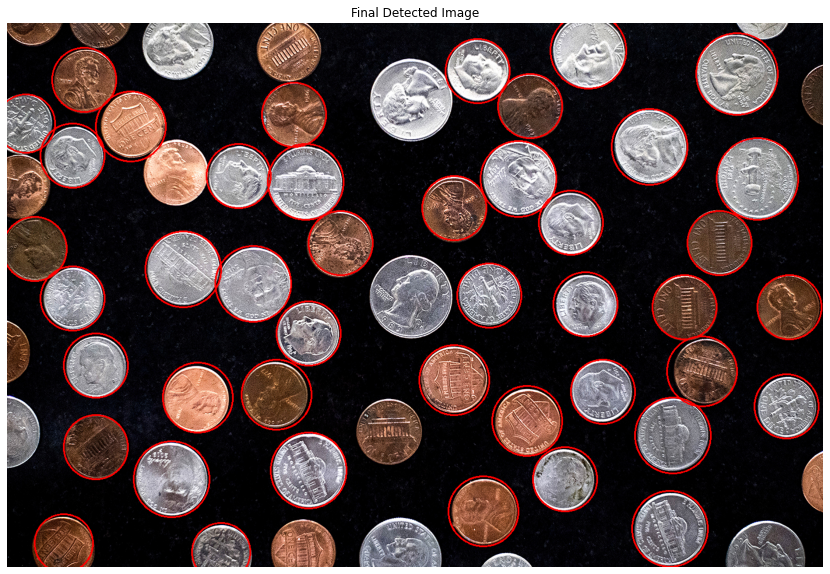

In [278]:
plt.figure(figsize=(15,10))
plt.imshow(im_with_circle.astype("uint8"))
plt.axis("off")
plt.title("Final Detected Image")
plt.show()

In [279]:
# saving the final Image
Image.fromarray(im_with_circle.astype("uint8")).save("results/res12-circles.jpg", "JPEG")

In [281]:
# printing the results
circles_detected = hough_windowed[hough_windowed!=0].shape[0]
print("The number of circles detected is:", circles_detected)

The number of circles detected is: 44


As can be seen, each circle is detected only one time which shows an accuracy of 100%. However, some coins in the sides of the image and 3 coints in the middle of the image are not detected which are negligible in comparison with the number of the ones which are detected.